<a href="https://colab.research.google.com/github/blondedman/visualizing-filters-CNN/blob/main/visualizing-filters-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MODEL

In [20]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import random

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.18.0


In [21]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3)
)

model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Get Layer Output

In [22]:
def get_submodel(layer_name):
    return tf.keras.models.Model(
        model.input,
        model.get_layer(layer_name).output
    )

get_submodel('block1_conv2').summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 38,720 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

## Image Visualization

In [23]:
def plot(image, title='random image'):
    image = image - tf.math.reduce_min(image)
    image = image / tf.math.reduce_max(image)
    plt.imshow(image)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

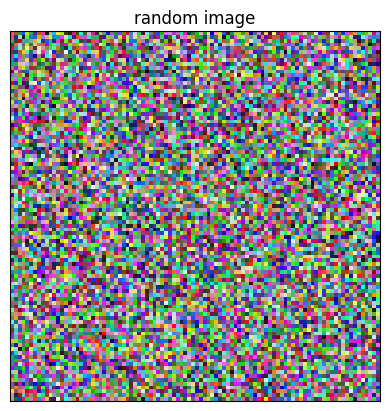

In [24]:
image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)
plot(image)

## Training Loop

In [25]:
def visualize_filter(layer_name, lr=0.1, iters=50, f_index=None):
    submodel = get_submodel(layer_name)

    num_filters = submodel.output.shape[-1]

    if f_index is None:
        f_index = random.randint(0, num_filters - 1)

    if f_index >= num_filters:
        raise ValueError(f'f_index ({f_index}) is out of range (max: {num_filters - 1})')

    print(f'maximizing image for layer {layer_name} and filter {f_index}')

    image = tf.random.uniform((1, 96, 96, 3), minval=-0.5, maxval=0.5)

    for i in range(iters):
        with tf.GradientTape() as tape:
            tape.watch(image)
            output = submodel(image)[:, :, :, f_index]
            loss = tf.reduce_mean(output)
        grads = tape.gradient(loss, image)

        grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-8)

        image = tf.clip_by_value(image + grads * lr, -0.5, 0.5)

    plot(image[0], f'{layer_name} ({f_index})')


## Final Results

In [26]:
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['input_layer_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


maximizing image for layer input_layer_1 and filter 0


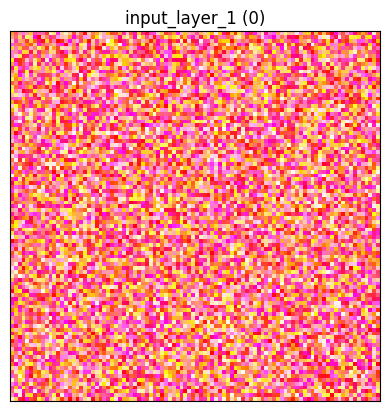

maximizing image for layer block1_conv1 and filter 9


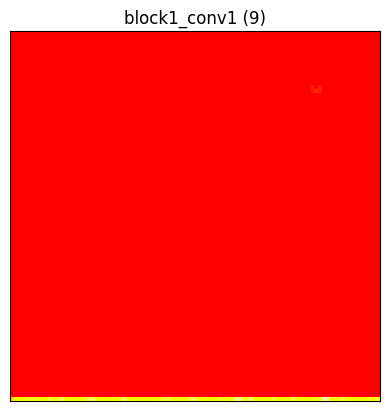

maximizing image for layer block1_conv2 and filter 28


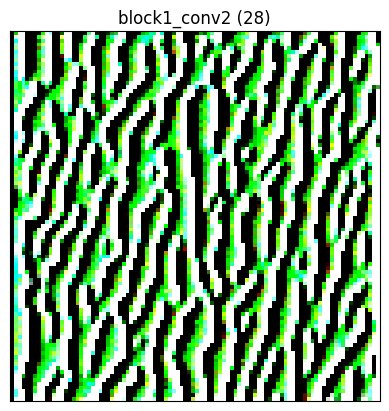

maximizing image for layer block1_pool and filter 38


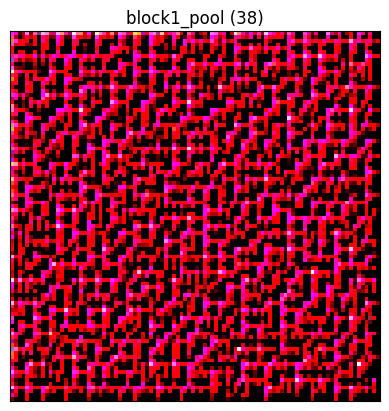

maximizing image for layer block2_conv1 and filter 113


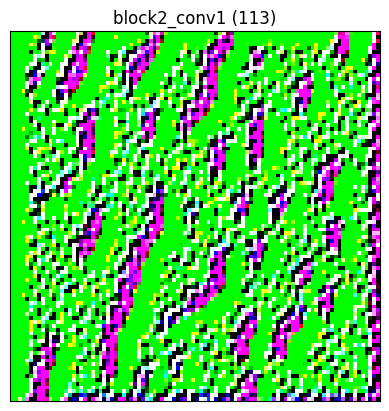

maximizing image for layer block2_conv2 and filter 24


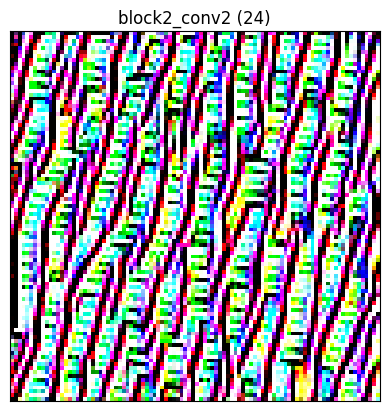

maximizing image for layer block2_pool and filter 110


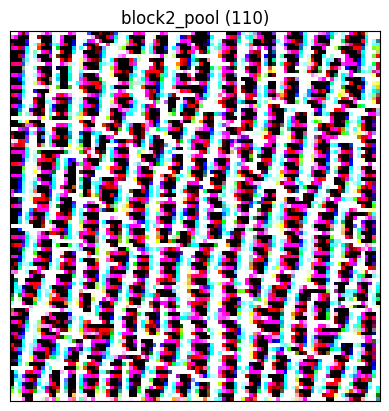

maximizing image for layer block3_conv1 and filter 148


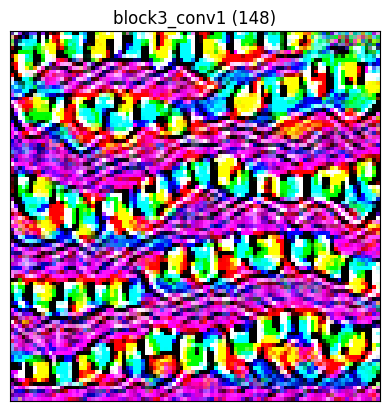

maximizing image for layer block3_conv2 and filter 210


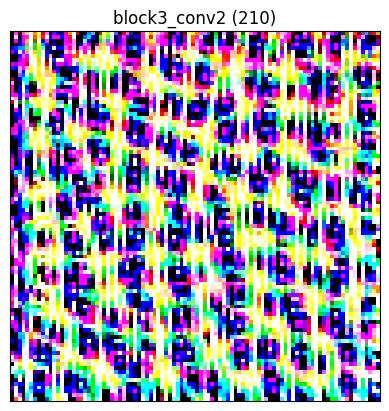

maximizing image for layer block3_conv3 and filter 122


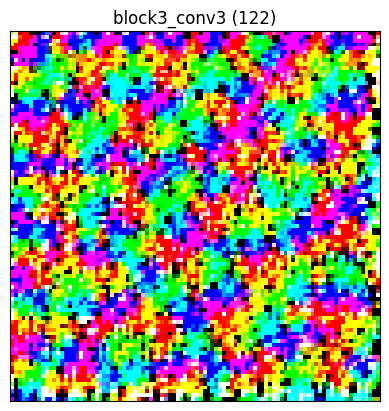

maximizing image for layer block3_pool and filter 170


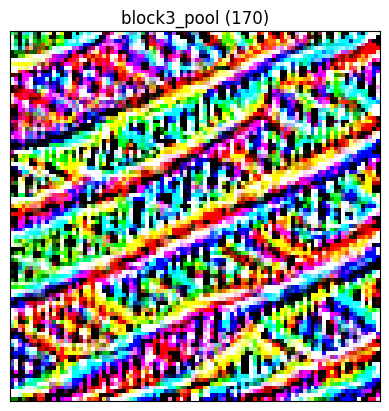

maximizing image for layer block4_conv1 and filter 282


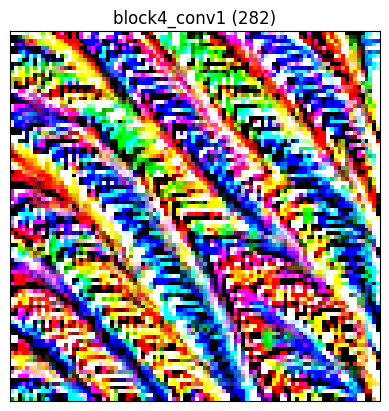

maximizing image for layer block4_conv2 and filter 405


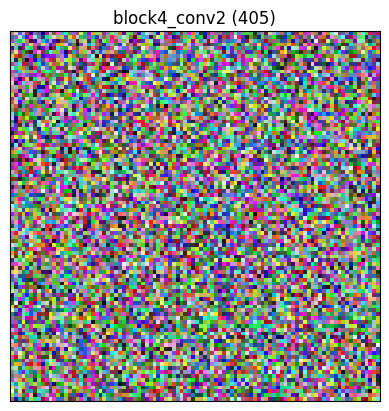

maximizing image for layer block4_conv3 and filter 275


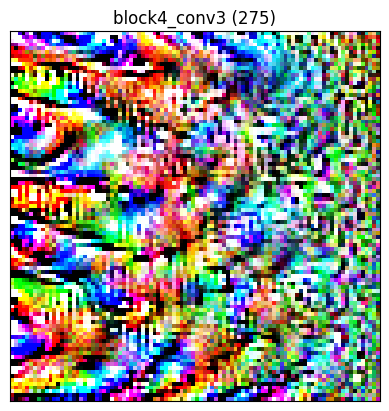

maximizing image for layer block4_pool and filter 505


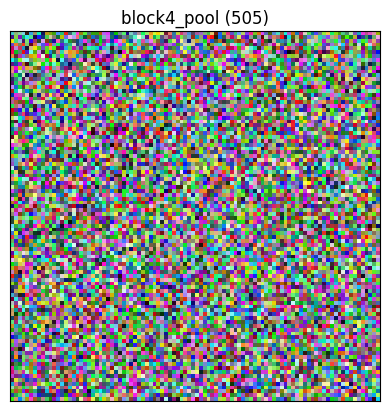

maximizing image for layer block5_conv1 and filter 135


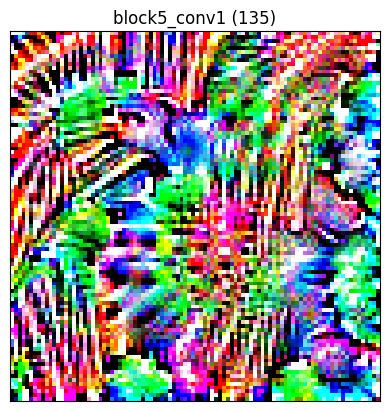

maximizing image for layer block5_conv2 and filter 409


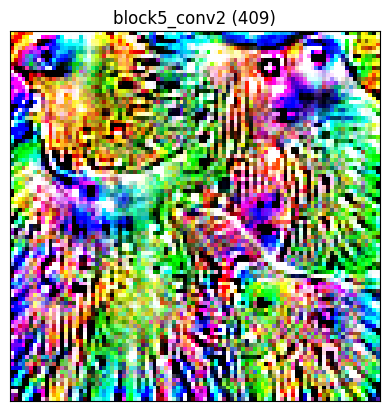

maximizing image for layer block5_conv3 and filter 365


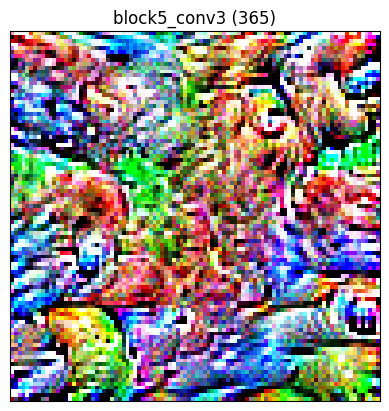

maximizing image for layer block5_pool and filter 308


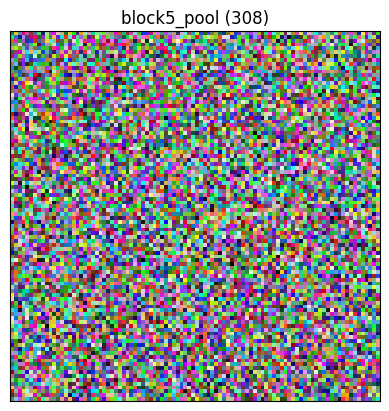

In [27]:
for layer in layer_names:
    visualize_filter(layer_name=layer)